# Subject 02

In [1]:
# loading data
%run EEG_auxiliary_module.ipynb
%matplotlib inline
import mne
epochs = mne.read_epochs('/Users/dannem/Documents/Ilya_study/Analysis/S02_perc-epo.fif')
epochs = block_average(epochs, 4, 11, kind='perc')

Reading /Users/dannem/Documents/Ilya_study/Analysis/S02_perc-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     995.00 ms
        0 CTF compensation matrices available
4400 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Starting averaging
Converting "time" to "<class 'numpy.int64'>"...
No zscoring performed


/Users/dannem/anaconda3/envs/mne/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


1100 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Applying baseline correction (mode: mean)


### Plot by conditions

Progress: [####################] 100.0%
 The duration is 0.1 minutes


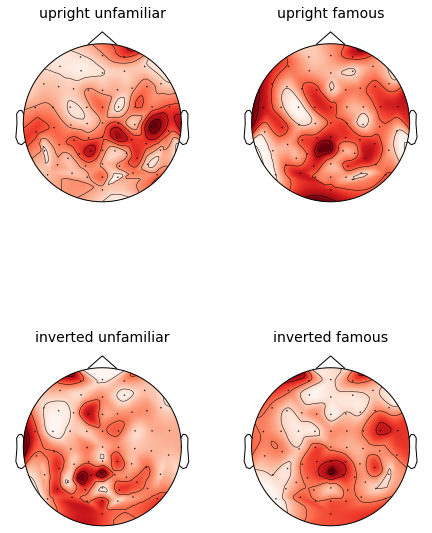

In [2]:
coefs = plot_coef_by_cond(epochs)

In [5]:
coefs[0].shape

(64,)

### Plot across conditions

Progress: [####################] 100.0%
 The duration is 1.8 minutes


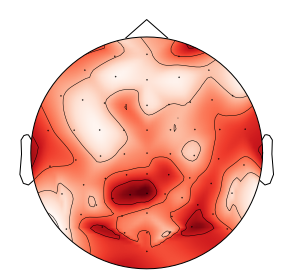

In [5]:
plot_coef_all(epochs)

# Subject 03

In [ ]:
# loading data
%run EEG_auxiliary_module.ipynb
%matplotlib inline
import mne
epochs = mne.read_epochs('F:/EEG_analysis/S03_perc-epo.fif')
epochs = block_average(epochs, 4, 12, kind='perc')

### Plot by condition

Progress: [####################] 100.0%
 The duration is 0.1 minutes


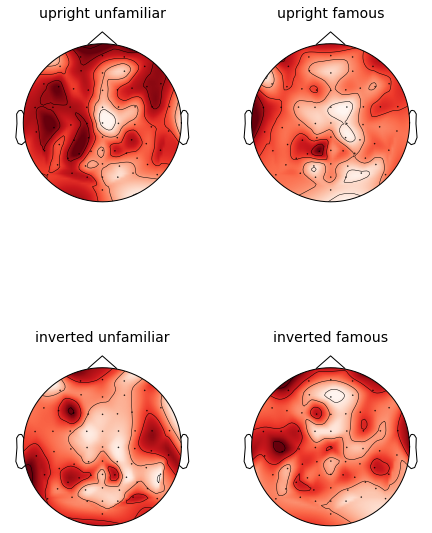

In [9]:
plot_coef_by_cond(epochs)

### Plot across conditions

Progress: [####################] 100.0%
 The duration is 2.3 minutes


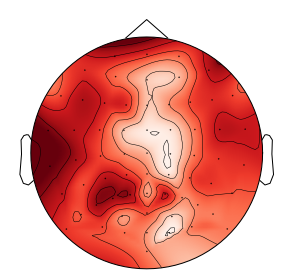

In [10]:
plot_coef_all(epochs)

# Subject 04

In [ ]:
# loading data
%run EEG_auxiliary_module.ipynb
%matplotlib inline
import mne
epochs = mne.read_epochs('F:/EEG_analysis/S04_perc-epo.fif')
epochs = block_average(epochs, 4, 12, kind='perc')

### Plot by condition

Progress: [####################] 100.0%
 The duration is 0.1 minutes


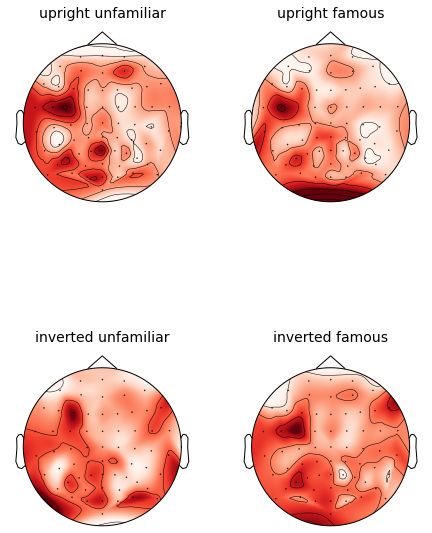

In [12]:
plot_coef_by_cond(epochs)

### Plot across conditions

Progress: [####################] 100.0%
 The duration is 2.2 minutes


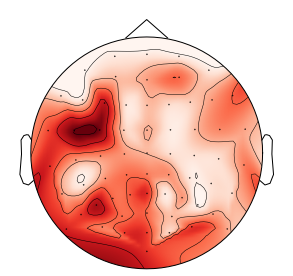

In [13]:
plot_coef_all(epochs)

In [ ]:
# loading data
%run EEG_auxiliary_module.ipynb
%matplotlib inline
import mne
import numpy as np
epochs = mne.read_epochs('/Users/dannem/Documents/Ilya_study/Analysis/S02_perc-epo.fif')
epochs = block_average(epochs, 4, 11, kind='perc')

X, Y = convert_epochs_to_2D_array(epochs_perc[[str(x) for x in range(101,126)]], times=times)
coef, duration = run_svm_coef(X,Y)
coefs_1=np.mean(np.abs(np.array(coef)),0)

In [6]:
%reset -f
%matplotlib qt
import sys
import mne
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

pick_ch=['P9','P7','P5','P3','PO7','PO3','O1','P10','P8','P6','P4','PO8','PO4','O2']
#%load_ext autoreload
#%autoreload 2
%run EEG_auxiliary_module.ipynb
%run general_tools.ipynb
mne.__version__
mne.set_log_level("WARNING")

infolder, outfolder = find_folder()
subs=['02','03','04','05','06','07','08','09','10','11','12','13']
imag=['31','32','33','34','35']
perc_imag = ['133','140','147','148','149']
perc=[str(x) for x in np.arange(126,151) if str(x) not in perc_imag]

In [27]:
%run EEG_auxiliary_module.ipynb
data=list()
labels = list()
trials=4
times=(0.05,0.65)
coefs_perc = []
coefs_perc_imag = []
for j in subs:
    print(j)
    fname = op.join(outfolder,'S'+j+'_perc-epo.fif')
    epochs = mne.read_epochs(fname)
    blocks=len(epochs['101'])/trials
    epochs = block_average(epochs, trials, blocks, kind='perc')
    X, Y = convert_epochs_to_2D_array(epochs[perc], times=times)
    coef, duration = run_svm_coef(X,Y)
    coefs_perc.append(np.mean(np.abs(np.array(coef)),0))
    X, Y = convert_epochs_to_2D_array(epochs[perc_imag], times=times)
    coef, duration = run_svm_coef(X,Y)
    coefs_perc_imag.append(np.mean(np.abs(np.array(coef)),0))
coefs_perc = np.array(coefs_perc)
coefs_perc_imag = np.array(coefs_perc_imag)
coefs_perc = np.mean(coefs_perc,axis=0)
coefs_perc_imag = np.mean(coefs_perc_imag,axis=0)

Progress: [####################] 100.0%
 The duration is 0.0 minutes


In [18]:
%run EEG_auxiliary_module.ipynb
data=list()
labels = list()
trials=8
times=(1,2)
coefs_imag = []
for j in subs:
    print(j)
    fname = op.join(outfolder,'S'+j+'_imag-epo.fif')
    epochs = mne.read_epochs(fname)
    blocks=len(epochs['31'])/trials
    epochs = block_average(epochs, trials, blocks, kind='imag')
    X, Y = convert_epochs_to_2D_array(epochs[imag], times=times)
    coef, duration = run_svm_coef(X,Y)
    coefs_imag.append(np.mean(np.abs(np.array(coef)),0))
coefs_imag = np.array(coefs_imag)
coefs_imag = np.mean(coefs_imag,axis=0)

Progress: [####################] 100.0%
 The duration is 0.0 minutes


In [28]:
import mne
fig, ax = plt.subplots(figsize=(10, 4),nrows=1,ncols=3)
mne.viz.plot_topomap(coefs_perc,epochs.info,vmin=np.min(coefs_perc), axes=ax[0], show=False)
ax[0].set_title('Perception 20 famous ids')
mne.viz.plot_topomap(coefs_perc_imag,epochs.info,vmin=np.min(coefs_perc_imag), axes=ax[1], show=False)
ax[1].set_title('Perception 5 famous ids')
mne.viz.plot_topomap(coefs_imag,epochs.info,vmin=np.min(coefs_imag), axes=ax[2], show=True)
ax[2].set_title('Imagery 5 ids')
plt.show()